Downloading Dataset

In [1]:
pip install opendatasets


In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/div456/indian-fabrics-3-classes")


Skipping, found downloaded files in "./indian-fabrics-3-classes" (use force=True to force download)


Importing Libraries


In [3]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization


Creating Train, Valid, Test Datasets


In [4]:
import pathlib

data_dir = pathlib.Path('/content/indian-fabrics-3-classes/train')

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(320, 320),
  batch_size=64,
  color_mode='rgb',
  labels='inferred',
  label_mode='int'
  )


Found 1068 files belonging to 3 classes.


In [6]:
data_dir = pathlib.Path('/content/indian-fabrics-3-classes/train')
valid_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(320, 320),
  batch_size=64,
  color_mode='rgb',
  labels='inferred',
  label_mode='int'
  )


Found 1068 files belonging to 3 classes.


In [7]:
data_dir = pathlib.Path('/content/indian-fabrics-3-classes/test')
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(320, 320),
  batch_size=64,
  color_mode='rgb',
  labels='inferred',
  label_mode='int'
  )


Found 49 files belonging to 3 classes.


In [8]:
batch_size = 64
img_height = 320
img_width = 320


Create & Train the model

In [30]:
model = Sequential()

In [31]:
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

In [32]:
# model.add(layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)))
# model.add(layers.RandomRotation(0.1, fill_mode='nearest'))
# model.add(layers.RandomZoom(0.1))
# model.add(layers.RandomContrast(0.1))
# model.add(layers.RandomBrightness(0.04))

In [33]:

# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

# model.add(Conv2D(128, 3, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'],
              run_eagerly=True
               )


In [35]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 320, 320, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 320, 320, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 160, 160, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 160, 160, 16)      4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 80, 80, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 102400)           

In [36]:
type(model)

keras.src.engine.sequential.Sequential

In [37]:
h = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=8,
  batch_size= 32
)


Epoch 1/8
17/17 [==============================] - 12s 608ms/step - loss: 1.7178 - accuracy: 0.3755 - val_loss: 1.0386 - val_accuracy: 0.4822
Epoch 2/8
17/17 [==============================] - 10s 549ms/step - loss: 1.0228 - accuracy: 0.5253 - val_loss: 0.9315 - val_accuracy: 0.7369
Epoch 3/8
17/17 [==============================] - 12s 616ms/step - loss: 0.7782 - accuracy: 0.6788 - val_loss: 0.4953 - val_accuracy: 0.8305
Epoch 4/8
17/17 [==============================] - 11s 549ms/step - loss: 0.3731 - accuracy: 0.8624 - val_loss: 0.2541 - val_accuracy: 0.9307
Epoch 5/8
17/17 [==============================] - 11s 569ms/step - loss: 0.2299 - accuracy: 0.9354 - val_loss: 0.1120 - val_accuracy: 0.9635
Epoch 6/8
17/17 [==============================] - 11s 600ms/step - loss: 0.0957 - accuracy: 0.9775 - val_loss: 0.0317 - val_accuracy: 0.9916
Epoch 7/8
17/17 [==============================] - 12s 613ms/step - loss: 0.0560 - accuracy: 0.9831 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 

In [ ]:
h.history

Text(0.5, 1.0, 'Accuracy vs Epochs')

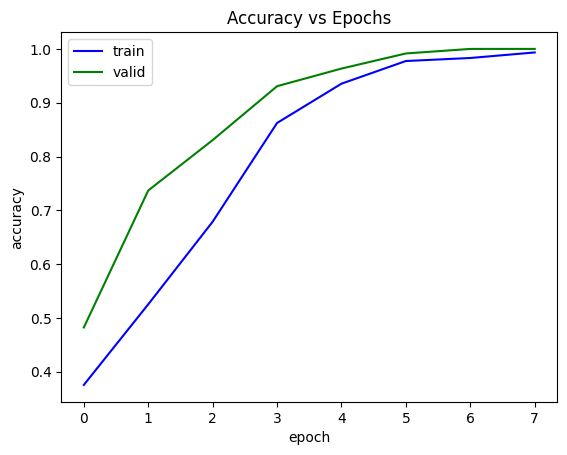

In [38]:
import matplotlib.pyplot as mp

mp.plot(h.history['accuracy'], color='blue')
mp.plot(h.history['val_accuracy'], color='green')
mp.xlabel('epoch')
mp.ylabel('accuracy')
mp.legend(['train', 'valid'])
mp.title('Accuracy vs Epochs')

Text(0.5, 1.0, 'Loss vs Epochs')

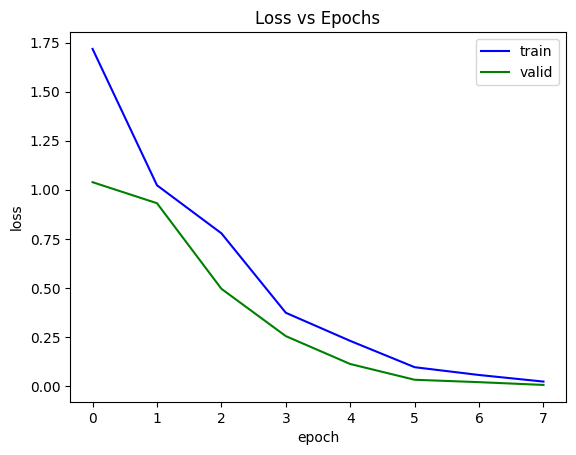

In [39]:
import matplotlib.pyplot as mp

mp.plot(h.history['loss'], color='blue')
mp.plot(h.history['val_loss'], color='green')
mp.xlabel('epoch')
mp.ylabel('loss')
mp.legend(['train', 'valid'])
mp.title('Loss vs Epochs')

Test the Model

In [40]:
loss, accuracy = model.evaluate(test_ds)
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')


1/1 [==============================] - 0s 243ms/step - loss: 1.3178 - accuracy: 0.6531
Test Accuracy: 0.65
Test Loss: 1.32


In [41]:
import numpy as np

In [51]:
for images, labels in test_ds:
    predictions = model.predict(images)
    for i in range(len(images)):
        image_path = test_ds.file_paths[i]  # Assuming test_ds contains file paths
        index_pred = np.argmax(predictions[i])
        class_names = ['Banarasi', 'Ikat', 'Pichwai']
        predicted_class = class_names[index_pred]
        print("Image Path:", image_path)
        print("Predicted class:", predicted_class)


2/2 [==============================] - 1s 397ms/step
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/images13_jpg.rf.f2a3b1720972de4bb75b7fcb062269c8.jpg
Predicted class: Ikat
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/images33_jpg.rf.b224fd1647ca405f955e199d2b136f2b.jpg
Predicted class: Banarasi
Image Path: /content/indian-fabrics-3-classes/test/Ikat/images33_jpg.rf.9e6ae9d131373c18cdbe6273089867f6.jpg
Predicted class: Banarasi
Image Path: /content/indian-fabrics-3-classes/test/Pichwai/pastel-hand-painted-pure-moonga-silk-pichwai-blouse-fabric-1-mtr-714991_jpg.rf.11185ddc8f105f1a385559cb725f5cc7.jpg
Predicted class: Banarasi
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/red-traditonal-banarasi-silk-brocade-fabric-2018415488-kfz42azv_jpg.rf.db3ab1c289bebaecbcff8767f5644a8c.jpg
Predicted class: Banarasi
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/FKACJRD10028_2_1200x_jpg.rf.b6a9cf3e00dfa401ad208adce5ffac55.jpg
Predicted class: B

In [43]:
from tensorflow.keras.preprocessing import image


In [50]:
img = image.load_img('/content/Ikat.png', target_size=(320, 320))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
a= model.predict(img_array)
pred_class_ind = np.argmax(a)
print(a)
print(class_names[pred_class_ind])



1/1 [==============================] - 0s 38ms/step
[[0.00851426 0.9519963  0.03948944]]
Ikat


In [45]:
class_names = test_ds.class_names
print("Class Names:", class_names)


Class Names: ['Banarasi', 'Ikat', 'Pichwai']
